# Abalone
**Reference**
- [Abalone dataset clustering for better prediction (CARL KIRSTEIN)](https://www.kaggle.com/code/carlkirstein/abalone-dataset-clustering-for-better-prediction)

In [111]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from colorama import Fore
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Data Preprocessing

### sklearn.preprocessing.StandarScaleer()
- 각각의 feature마다 독립적으로 값을 중앙으로 옮기고 스케일링을 해줌
- The magical formula which performs standardization:  
$
    x_{scaled} = \cfrac{x-\text{mean}}{sd}
$
<img src="./Standardization.png" width="400px" height="250px" title="Standardization"></img>
$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \text{mean 0, variance 1}$
- **fit_transform()**
    - train dataset에만 사용
    - 만들어진 모델은 train data 에 있는 mean과 variance를 학습
    - 학습된 Scaler()의 parameter는 test data를 scale하는데 사용
    - 즉, train data로 학습된 Scaler()의 parameter를 통해 test data의 feature값들이 scale됨
- **transform()**
    - train data로부터 학습된 mean, variance parameter를 test data에 적용하기위해 사용
    - test data에 사용

In [113]:
df = pd.read_csv('abalone.csv')
X_cat = ['Sex']
X_num = [x for x in df.columns if x not in ['Sex','Rings']]

df = pd.get_dummies(data=df, columns=X_cat, drop_first=True)

scaler = StandardScaler()
df[X_num] = scaler.fit_transform(df[X_num])

X = df.drop(['Rings'], axis=1)
y = df['Rings']

## PCA Test

In [114]:
from sklearn.decomposition import PCA

In [176]:
pca = PCA()
X_pca = pca.fit_transform(X)
component_names = [f"PC{i+1}" for i in range(0, len(X.columns))]
#component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(data=X_pca, columns=component_names)
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.676404,-0.201851,-0.937962,-0.344334,-0.078364,0.005633,0.082772,0.092786,-0.016068
1,-3.271538,0.116422,-1.046744,0.231463,-0.051201,-0.122404,0.071667,-0.011346,0.007059
2,-0.462562,0.260267,0.141331,-0.467532,-0.195718,-0.418823,0.101105,0.030739,-0.041381
3,-1.431105,0.377482,-0.799585,-0.011051,-0.002505,-0.006787,-0.006978,0.175356,0.003278
4,-3.719928,-0.334855,0.234526,0.283843,0.013427,0.105374,0.000832,0.064535,-0.028547
...,...,...,...,...,...,...,...,...,...
4172,0.811949,0.360658,0.285113,-0.082603,0.070157,-0.516858,-0.235089,0.060202,0.049555
4173,0.781121,-0.202867,-0.679912,-0.295153,0.130326,0.090645,-0.052552,-0.149703,0.000080
4174,2.218938,0.792601,-0.339297,0.412209,0.409121,0.083146,-0.248983,0.041716,0.024052
4175,1.651859,-0.336890,0.236531,-0.321573,0.157923,-0.412979,0.050072,-0.033195,0.098123


### Explained Variance

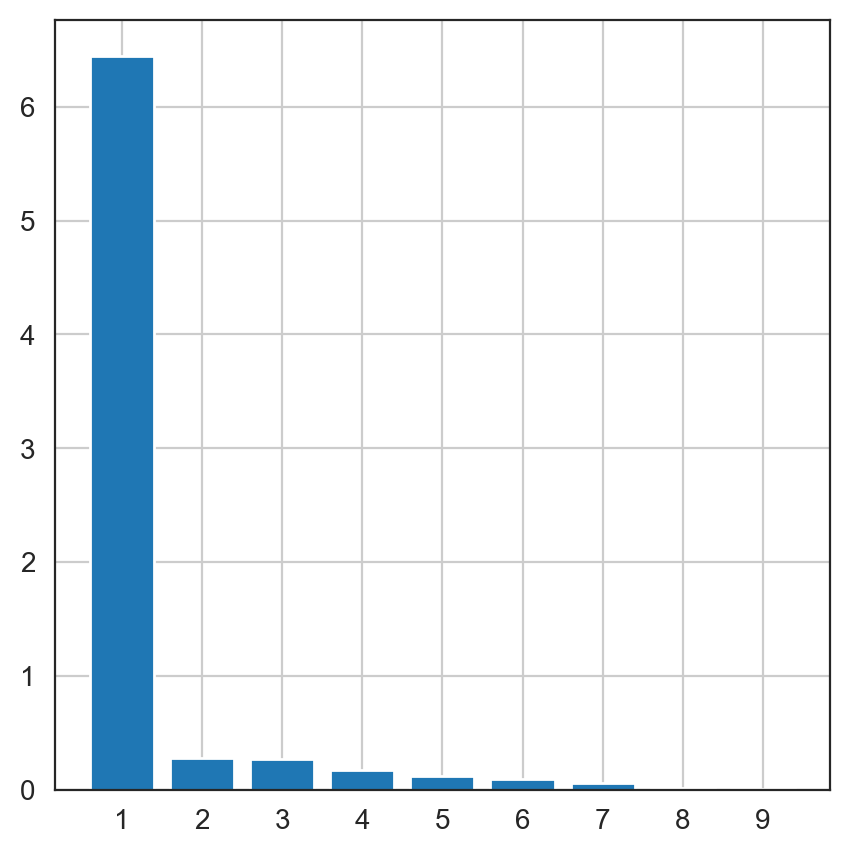

In [143]:
fig, axe = plt.subplots(1,1, figsize=(5,5))
axe=plt.bar(range(1,pca.n_components_+1), pca.explained_variance_)
axe=plt.grid()
axe=plt.xticks(range(1,pca.n_components_+1))
axe=plt.show()

### Explained Variance Ratio

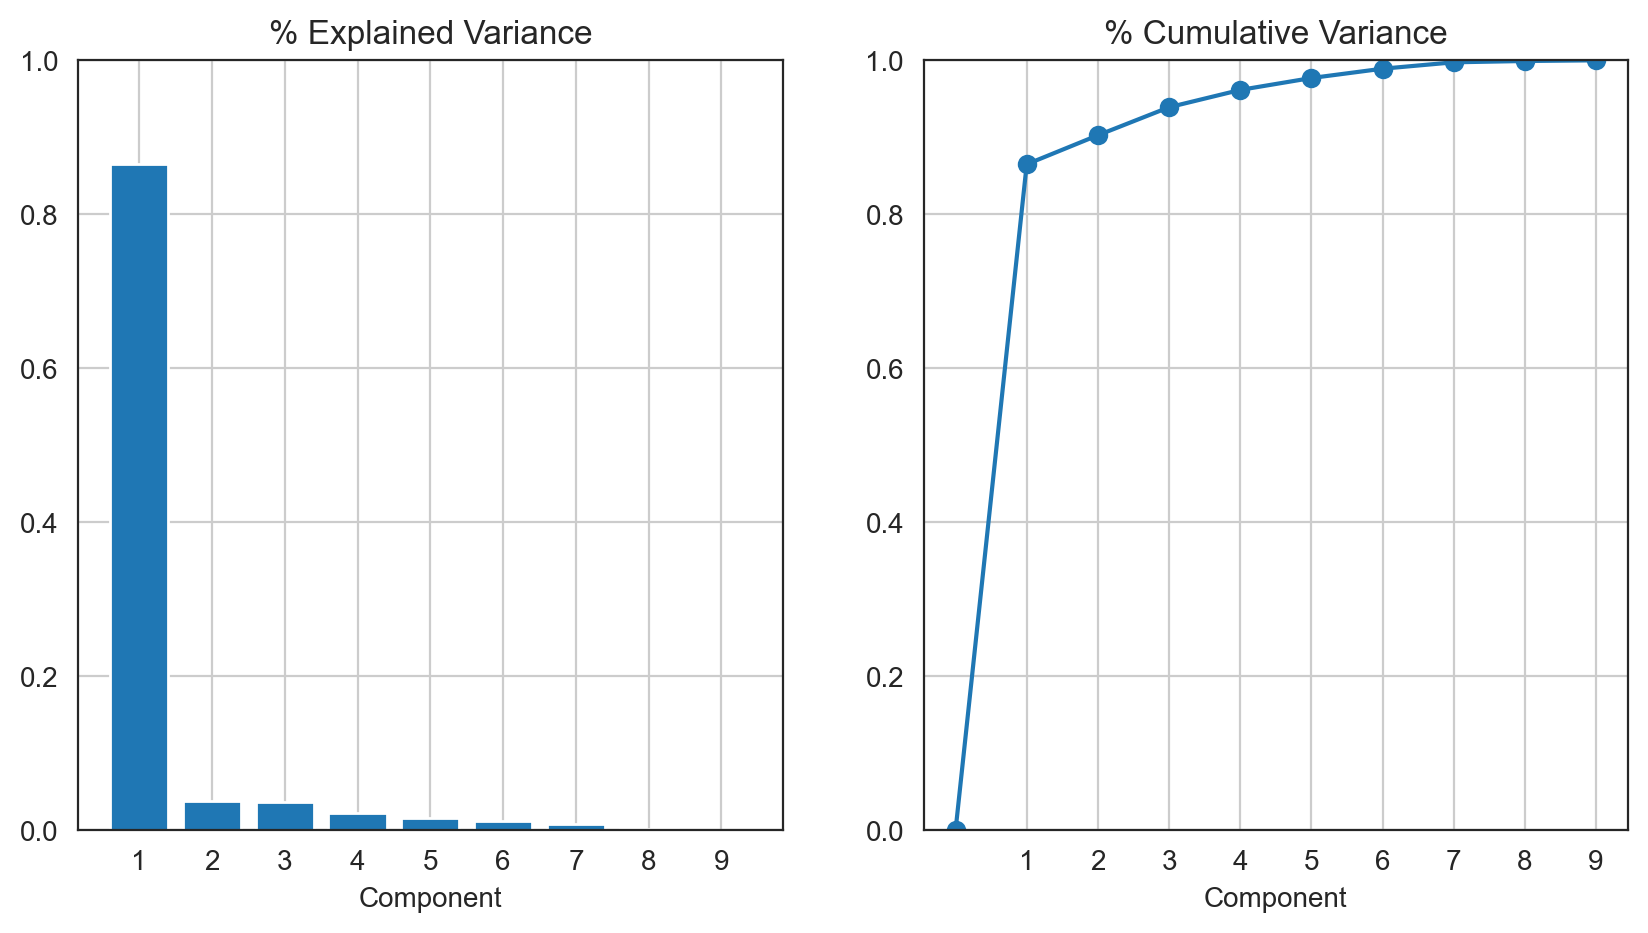

In [153]:
def plot_variance(pca):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    n = pca.n_components_
    grid = np.arange(1, n+1)
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0, 1), xticks=range(1, n+1)
    )
    axs[0].grid()
    cv=np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0, 1), xticks=range(1, n+1)
    )
    axs[1].grid()

    return axs

if __name__=="__main__":
    plot_variance(pca)

In [175]:
print("variance Ratio")
for idx, i in enumerate(pca.explained_variance_ratio_):
    print(f"PCA{idx+1} = {i:2.0%}")

variance Ratio
PCA1 = 86%
PCA2 = 4%
PCA3 = 4%
PCA4 = 2%
PCA5 = 2%
PCA6 = 1%
PCA7 = 1%
PCA8 = 0%
PCA9 = 0%


<Figure size 1500x1500 with 0 Axes>

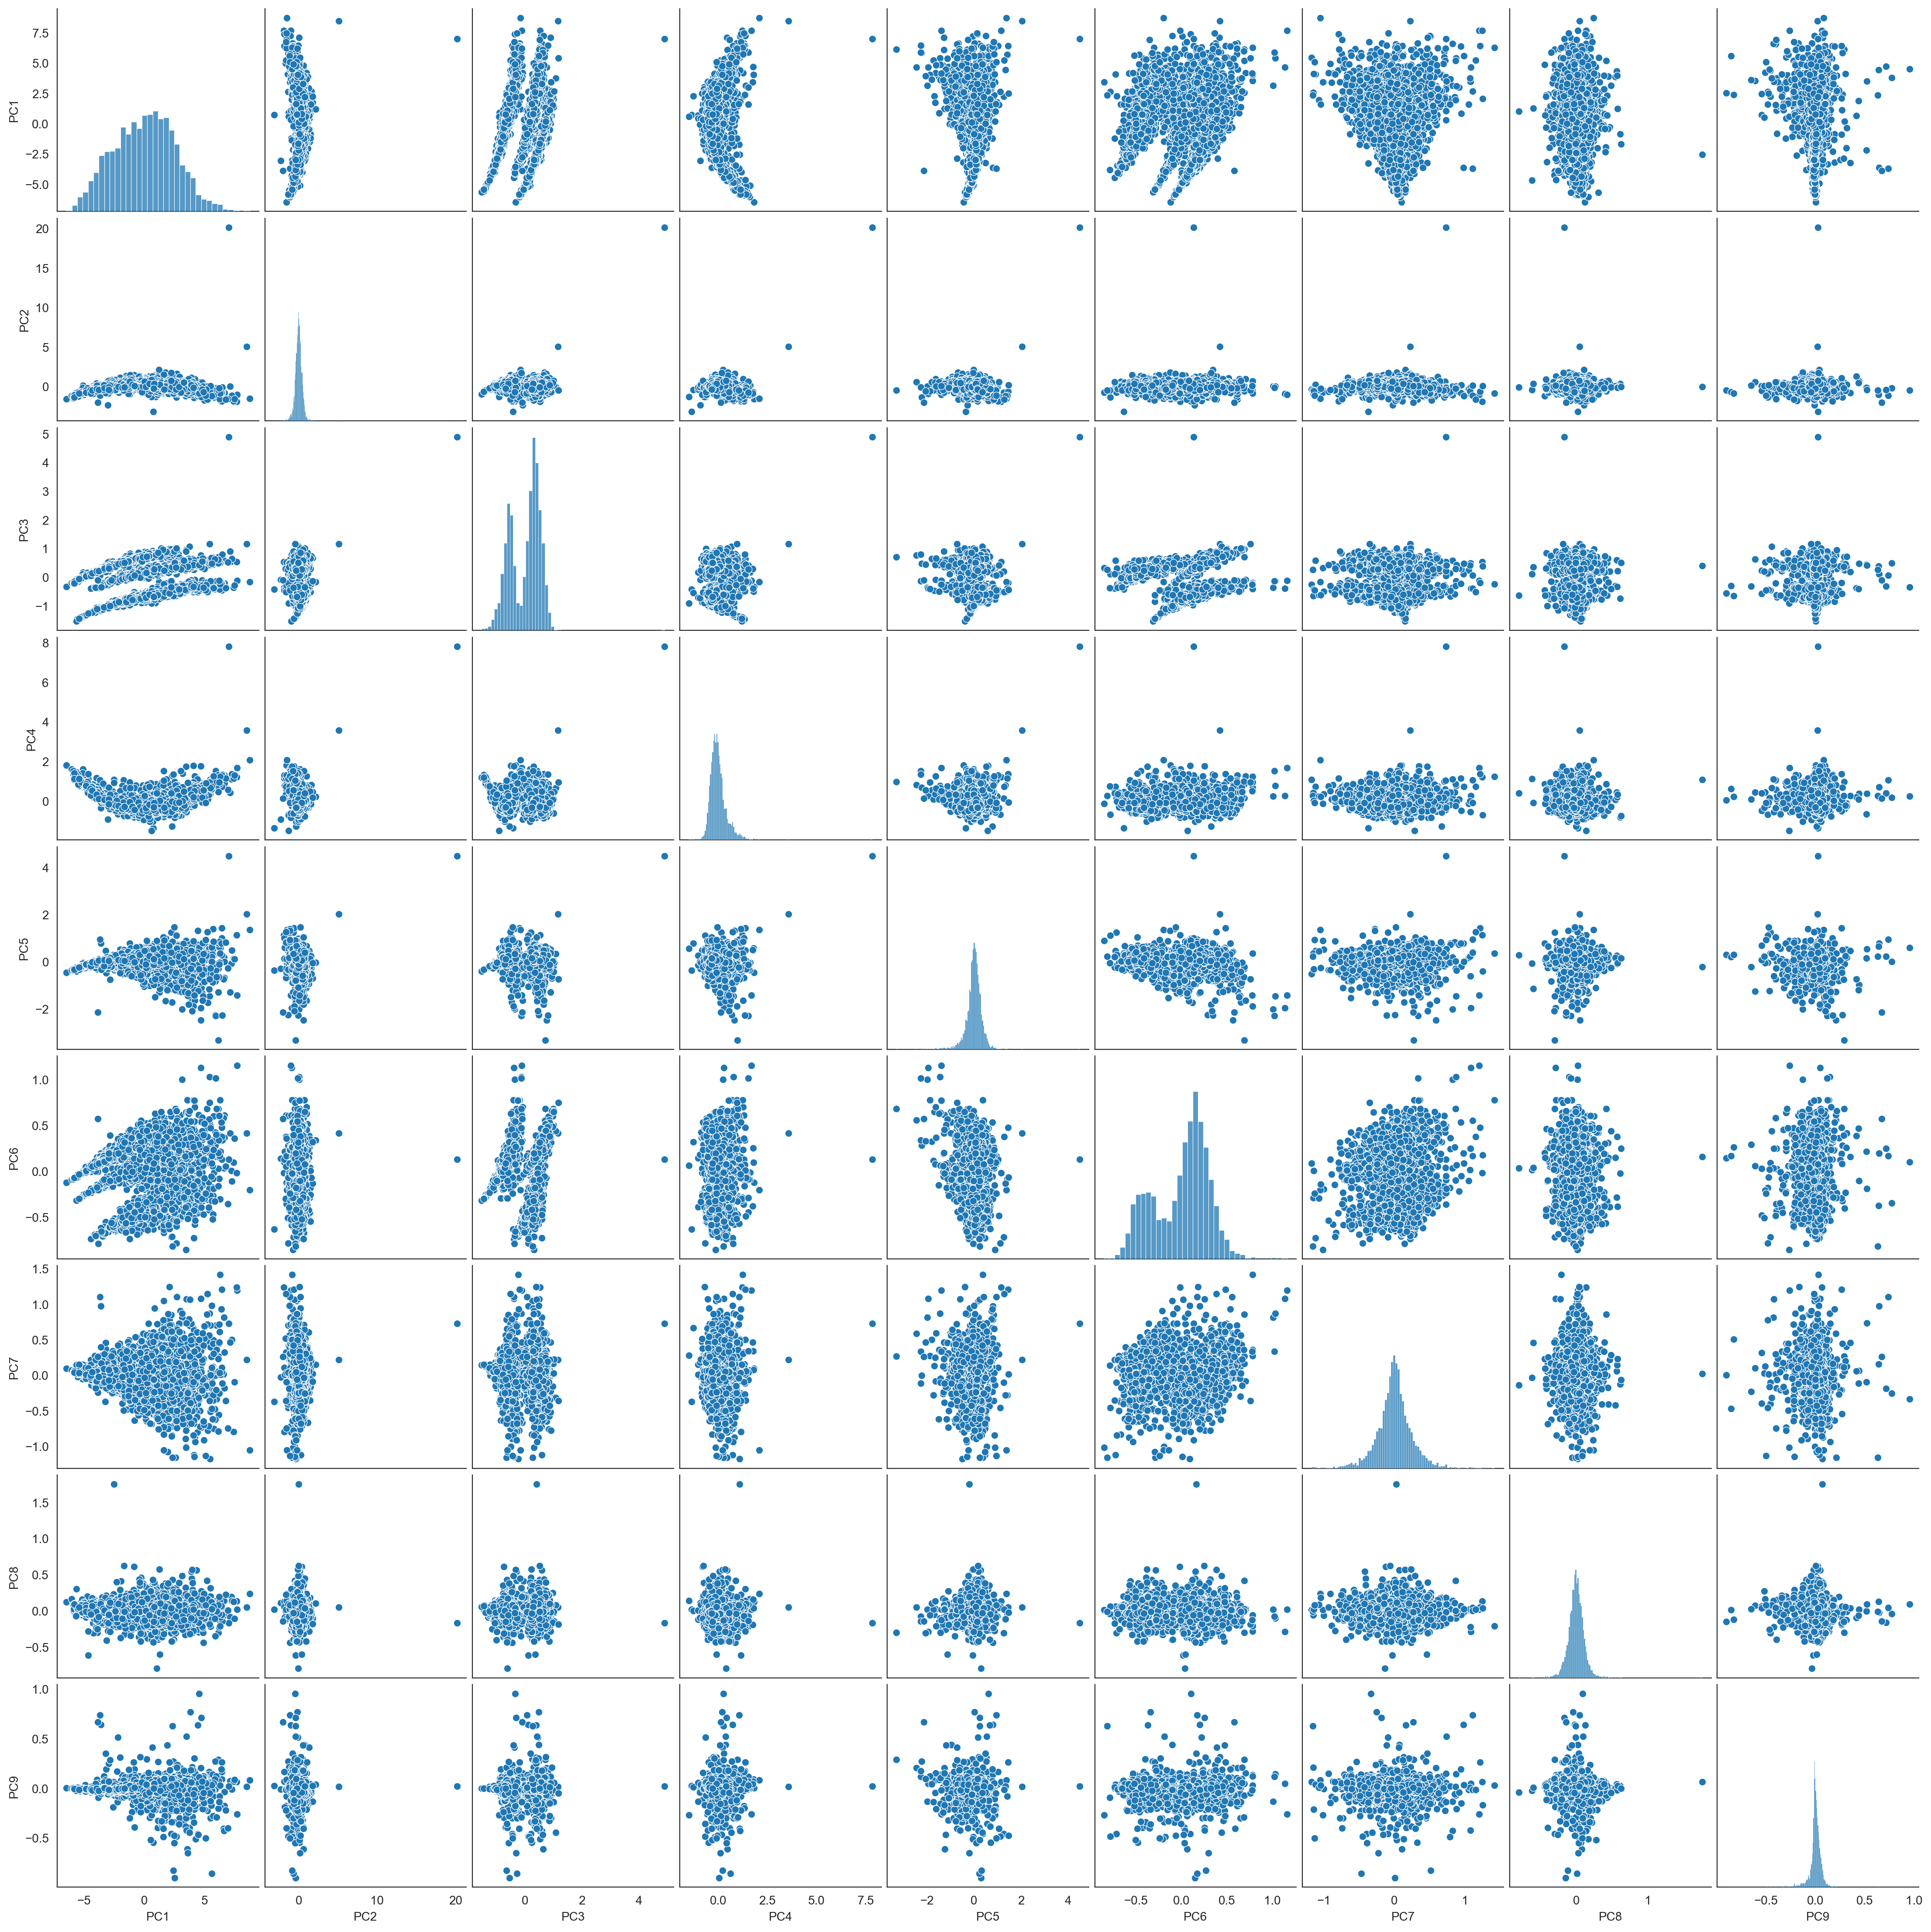

In [154]:
plt.figure(figsize=(15,15))
sns.set_style('white') # background
plot_kws={"s": 1}
g = sns.pairplot(
             X_pca,
             # kind='reg',
             diag_kind='hist',
             corner=False,
             # plot_kws=dict(scatter_kws=dict(s=5)),
             palette='cividis',
             # hue='kmeans'
            )

# g = g.map_diag(sns.kdeplot, lw=2)
# g = g.map_offdiag(sns.kdeplot, lw=0.5)
plt.show()

In [195]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = [f"PC{i}" for i in range(1,num_pc+1)]

loadings_df = pd.DataFrame.from_dict(data = dict(zip(pc_list, loadings)))
loadings_df.set_index(X.columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Length,0.380460,0.025526,0.060856,-0.589441,0.104809,0.041672,-0.061873,-0.697480,-0.020636
Diameter,0.380891,0.056565,0.049603,-0.583163,0.019797,0.029527,-0.012297,0.712484,0.011589
Height,0.345754,0.838739,0.204123,0.321796,0.175366,0.027505,0.013324,-0.008038,0.000278
Whole weight,0.387832,-0.237313,-0.012514,0.230928,-0.050286,0.035448,0.105692,0.016988,-0.851199
Shucked weight,0.375325,-0.352217,-0.033635,0.236051,0.500949,0.057018,0.533678,0.009725,0.372981
Viscera weight,0.378815,-0.253174,-0.025092,0.267239,0.106518,-0.283355,-0.765764,0.030324,0.203483
Shell weight,0.376181,-0.067146,0.033929,0.160100,-0.806079,0.245858,0.139271,-0.057478,0.307061
Sex_I,-0.108401,-0.159391,0.522558,0.050016,0.177263,0.765991,-0.260497,0.034147,-0.009303
Sex_M,0.050788,0.135203,-0.822213,0.018148,0.108906,0.514441,-0.161896,0.007112,-0.002513


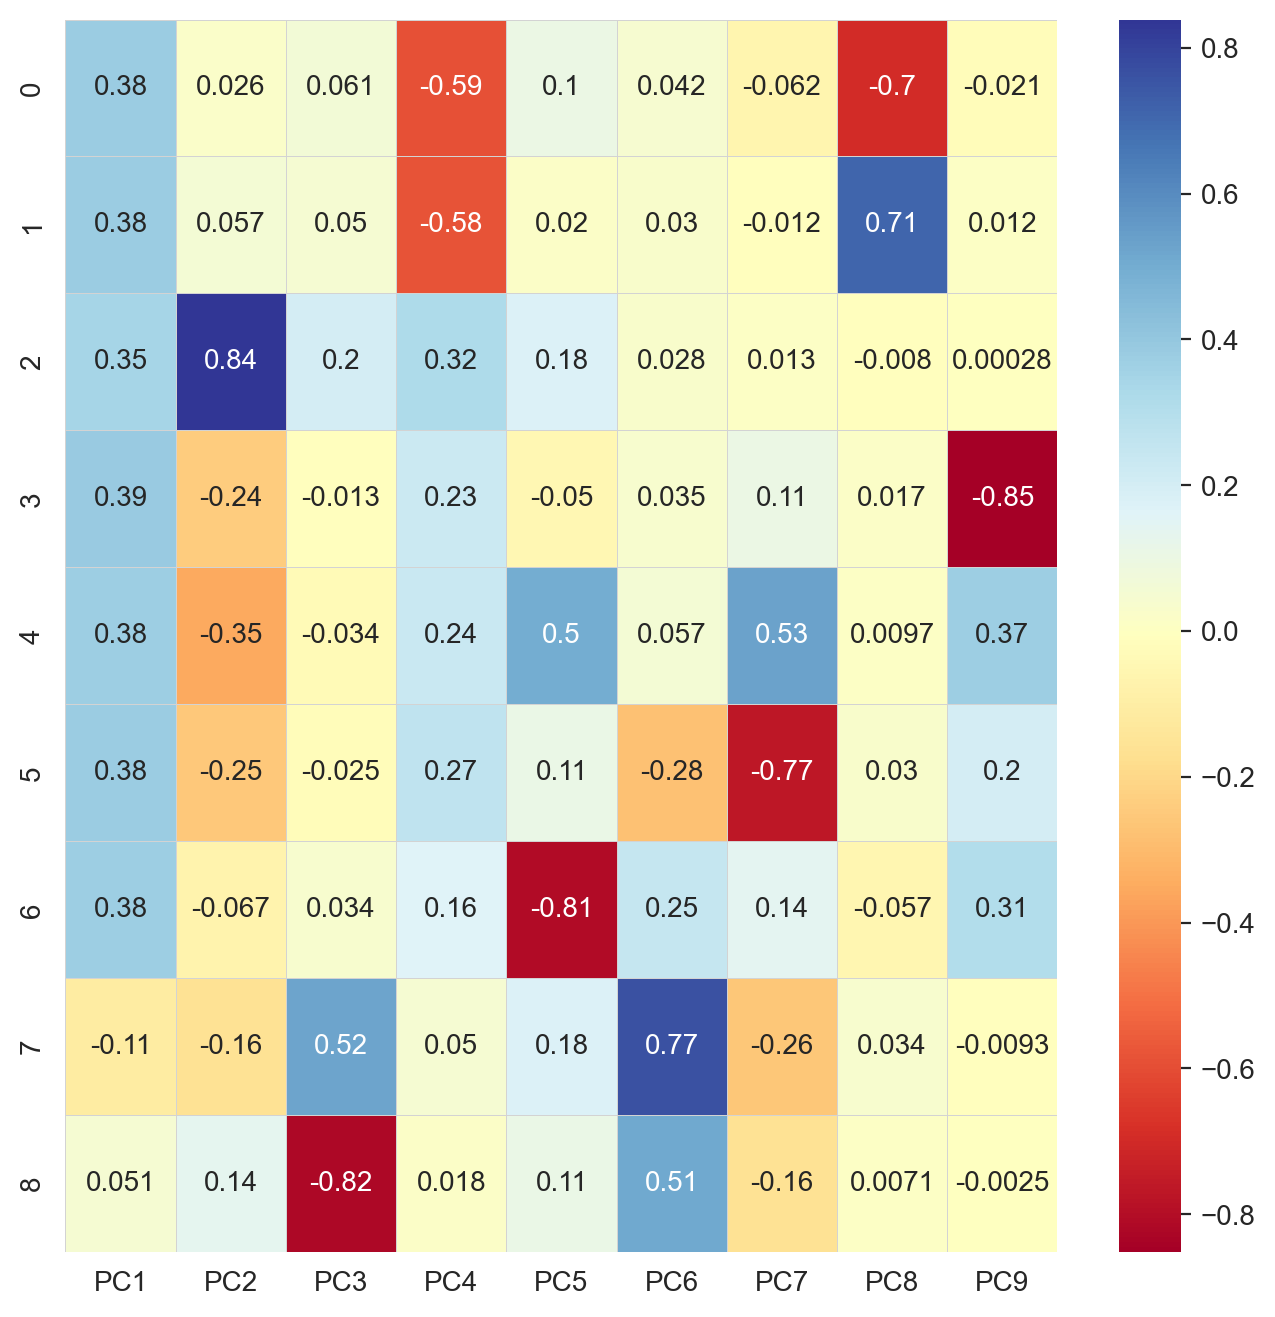

In [207]:
plt.figure(figsize=(8, 8))
threshold = 0.
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
sns.heatmap(loadings_df,
            cmap="RdYlBu",
            annot=True,
            annot_kws={"size":10, },
            linewidths=0.2,
            linecolor='lightgrey',
           ).set_facecolor('white')
plt.show()

## Train Test Split

In [209]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13725, shuffle=True)
# radom_state: Seed, shuffle(*default) = True

## Modeling

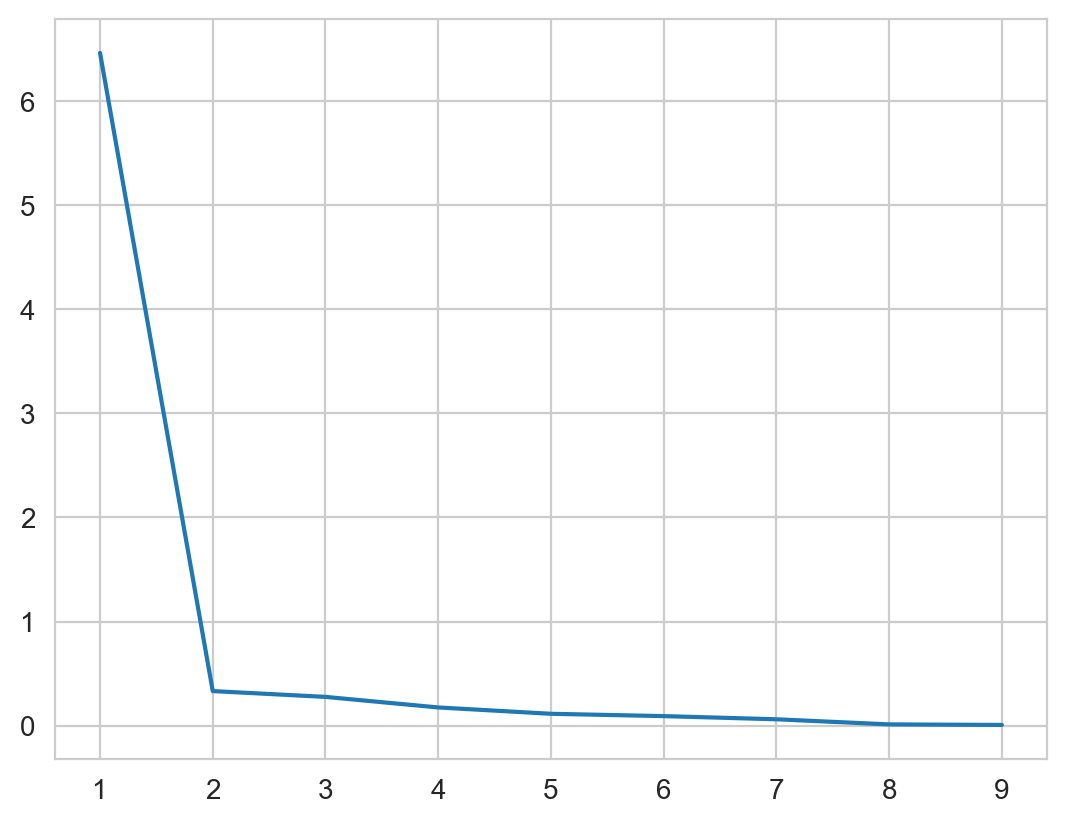

In [218]:
sns.set_style("whitegrid", {"axes.facecolor": "1"})
accuracy_list = []
pca=PCA()
pca.fit(x_train)
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_)
plt.show()

In [240]:
pca = PCA(n_components=9)
pca.fit(x_train)

PCA(n_components=9)

In [241]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(max_depth=2, random_state=13725)
lgb_clf.fit(x_train, y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)

In [242]:
print(Fore.GREEN + f'Accuracy of LGBM Classifier is : {100*lgb_acc:.2f}%')

Accuracy of LGBM Classifier is : 26.63%


In [243]:
lgb_pca_clf = lgb.LGBMClassifier(max_depth=2, random_state=13725)
lgb_pca_clf.fit(pca.transform(x_train), y_train)
lgb_pca_pred = lgb_pca_clf.predict(pca.transform(x_test))
lgb_pca_acc = accuracy_score(y_test, lgb_pca_pred)
accuracy_list.append(100*lgb_pca_acc)

In [246]:
print(Fore.GREEN + f'Accuracy of LGBM Classifier after PCA is : {100*lgb_pca_acc:.2f}%')

Accuracy of LGBM Classifier after PCA is : 27.51%


### K_means Clustering

In [247]:
from sklearn.cluster import KMeans

float_columns = [x for x in df.columns if x not in ['Rings']]
kmeans = KMeans(n_clusters=3, random_state=13725)
kmeans = kmeans.fit(df[float_columns])

df['kmeans'] = kmeans.predict(df[float_columns])

In [248]:
km_list = []
for clust in range(1, 21):
    km = KMeans(n_clusters=clust, random_state=13725)
    km.fit(df[float_columns])
    km_list.append(pd.Series({'clusters':clust, 
                              'inertia':km.inertia_, 
                              'model' :km}))

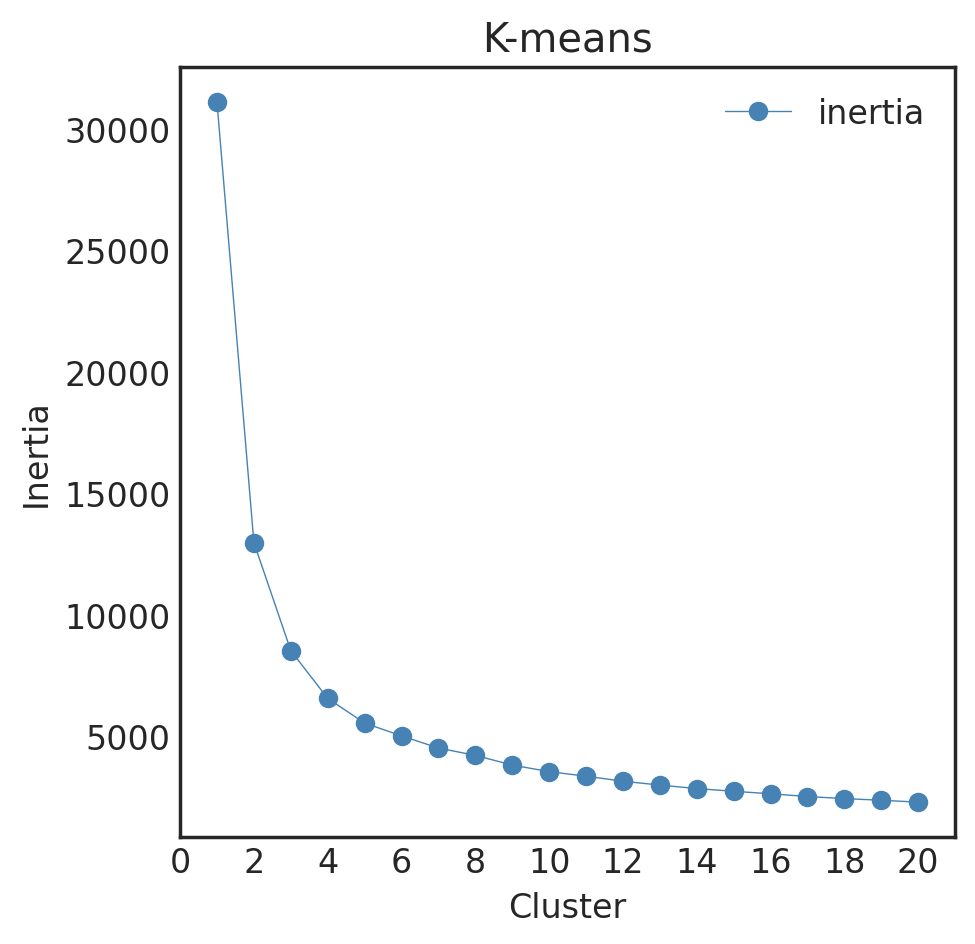

In [249]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['font.family']='DejaVu Sans'
plt.rcParams['font.size']=12
plt.rcParams['lines.linewidth']=0.5
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12

plot_data = (pd.concat(km_list, axis=1).T[['clusters','inertia']].set_index('clusters'))

ax = plot_data.plot(marker='o', ls='-', color='steelblue')
ax.set_title('K-means')
ax.set_xticks(range(0, 21, 2))
ax.set_xlim(0, 21)
ax.set(xlabel='Cluster', ylabel='Inertia')
plt.show()

In [250]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=3)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [251]:
print(Fore.GREEN + f"Accuracy of K Neighbors Classifier is : {100*kn_acc:.2f}%")

Accuracy of K Neighbors Classifier is : 19.30%


In [252]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [253]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  23.92%


In [254]:
from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [255]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  25.60%


In [260]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train, y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [261]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  27.51%


In [262]:
import xgboost as xgb

xgb_clf = xgb.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train, y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]

In [263]:
print(Fore.GREEN + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

NameError: name 'xgb_acc' is not defined

In [264]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(max_depth=2,random_state=4)
lgb_clf.fit(x_train, y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)

In [265]:
print(Fore.GREEN + f'Accuracy of LGBM Classifier is : {100*lgb_acc:.2f}%')

Accuracy of LGBM Classifier is : 26.63%


In [266]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_pred = cat_clf.predict(x_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.083576
0:	learn: 3.0889210	total: 72.2ms	remaining: 1m 12s
1:	learn: 2.9367749	total: 80.5ms	remaining: 40.2s
2:	learn: 2.8162867	total: 88.7ms	remaining: 29.5s
3:	learn: 2.7153944	total: 95.9ms	remaining: 23.9s
4:	learn: 2.6347144	total: 103ms	remaining: 20.5s
5:	learn: 2.5666572	total: 111ms	remaining: 18.3s
6:	learn: 2.5099535	total: 118ms	remaining: 16.8s
7:	learn: 2.4556061	total: 125ms	remaining: 15.5s
8:	learn: 2.4123432	total: 132ms	remaining: 14.5s
9:	learn: 2.3747034	total: 137ms	remaining: 13.5s
10:	learn: 2.3398959	total: 144ms	remaining: 12.9s
11:	learn: 2.3083842	total: 151ms	remaining: 12.4s
12:	learn: 2.2819600	total: 157ms	remaining: 11.9s
13:	learn: 2.2591358	total: 164ms	remaining: 11.6s
14:	learn: 2.2389753	total: 171ms	remaining: 11.2s
15:	learn: 2.2196391	total: 175ms	remaining: 10.8s
16:	learn: 2.2014141	total: 182ms	remaining: 10.5s
17:	learn: 2.1860141	total: 188ms	remaining: 10.3s
18:	learn: 2.1708081	total: 196ms	remaining: 10.1s
19:	le

163:	learn: 1.7449055	total: 1.21s	remaining: 6.18s
164:	learn: 1.7431895	total: 1.22s	remaining: 6.17s
165:	learn: 1.7424362	total: 1.23s	remaining: 6.16s
166:	learn: 1.7406667	total: 1.23s	remaining: 6.15s
167:	learn: 1.7395324	total: 1.24s	remaining: 6.14s
168:	learn: 1.7374893	total: 1.25s	remaining: 6.13s
169:	learn: 1.7366456	total: 1.25s	remaining: 6.12s
170:	learn: 1.7334277	total: 1.26s	remaining: 6.11s
171:	learn: 1.7330679	total: 1.27s	remaining: 6.1s
172:	learn: 1.7323200	total: 1.27s	remaining: 6.09s
173:	learn: 1.7311765	total: 1.28s	remaining: 6.08s
174:	learn: 1.7290400	total: 1.29s	remaining: 6.07s
175:	learn: 1.7283994	total: 1.29s	remaining: 6.06s
176:	learn: 1.7275868	total: 1.3s	remaining: 6.05s
177:	learn: 1.7269311	total: 1.31s	remaining: 6.04s
178:	learn: 1.7261456	total: 1.31s	remaining: 6.04s
179:	learn: 1.7252559	total: 1.32s	remaining: 6.02s
180:	learn: 1.7231271	total: 1.33s	remaining: 6.01s
181:	learn: 1.7226852	total: 1.33s	remaining: 6s
182:	learn: 1.721

340:	learn: 1.5303533	total: 2.44s	remaining: 4.72s
341:	learn: 1.5292994	total: 2.45s	remaining: 4.71s
342:	learn: 1.5283402	total: 2.46s	remaining: 4.7s
343:	learn: 1.5276375	total: 2.46s	remaining: 4.7s
344:	learn: 1.5273465	total: 2.47s	remaining: 4.69s
345:	learn: 1.5255402	total: 2.48s	remaining: 4.68s
346:	learn: 1.5251241	total: 2.48s	remaining: 4.67s
347:	learn: 1.5237527	total: 2.49s	remaining: 4.67s
348:	learn: 1.5233509	total: 2.5s	remaining: 4.66s
349:	learn: 1.5226497	total: 2.5s	remaining: 4.65s
350:	learn: 1.5211785	total: 2.51s	remaining: 4.64s
351:	learn: 1.5189909	total: 2.52s	remaining: 4.64s
352:	learn: 1.5181284	total: 2.52s	remaining: 4.63s
353:	learn: 1.5178909	total: 2.53s	remaining: 4.62s
354:	learn: 1.5172089	total: 2.54s	remaining: 4.61s
355:	learn: 1.5162608	total: 2.55s	remaining: 4.61s
356:	learn: 1.5160517	total: 2.55s	remaining: 4.6s
357:	learn: 1.5153424	total: 2.56s	remaining: 4.59s
358:	learn: 1.5149512	total: 2.57s	remaining: 4.58s
359:	learn: 1.514

517:	learn: 1.3506792	total: 3.66s	remaining: 3.41s
518:	learn: 1.3500446	total: 3.67s	remaining: 3.4s
519:	learn: 1.3482467	total: 3.68s	remaining: 3.39s
520:	learn: 1.3469471	total: 3.68s	remaining: 3.39s
521:	learn: 1.3464023	total: 3.69s	remaining: 3.38s
522:	learn: 1.3452841	total: 3.7s	remaining: 3.37s
523:	learn: 1.3451439	total: 3.71s	remaining: 3.37s
524:	learn: 1.3434536	total: 3.71s	remaining: 3.36s
525:	learn: 1.3417670	total: 3.72s	remaining: 3.35s
526:	learn: 1.3404412	total: 3.73s	remaining: 3.35s
527:	learn: 1.3392993	total: 3.73s	remaining: 3.34s
528:	learn: 1.3380361	total: 3.74s	remaining: 3.33s
529:	learn: 1.3364019	total: 3.75s	remaining: 3.32s
530:	learn: 1.3355421	total: 3.75s	remaining: 3.31s
531:	learn: 1.3347192	total: 3.76s	remaining: 3.31s
532:	learn: 1.3332021	total: 3.77s	remaining: 3.3s
533:	learn: 1.3323589	total: 3.77s	remaining: 3.29s
534:	learn: 1.3320060	total: 3.78s	remaining: 3.29s
535:	learn: 1.3304621	total: 3.79s	remaining: 3.28s
536:	learn: 1.3

692:	learn: 1.1980345	total: 4.87s	remaining: 2.16s
693:	learn: 1.1970299	total: 4.88s	remaining: 2.15s
694:	learn: 1.1956926	total: 4.89s	remaining: 2.14s
695:	learn: 1.1951251	total: 4.89s	remaining: 2.14s
696:	learn: 1.1942275	total: 4.9s	remaining: 2.13s
697:	learn: 1.1935501	total: 4.91s	remaining: 2.12s
698:	learn: 1.1921694	total: 4.91s	remaining: 2.12s
699:	learn: 1.1917652	total: 4.92s	remaining: 2.11s
700:	learn: 1.1902481	total: 4.93s	remaining: 2.1s
701:	learn: 1.1892392	total: 4.93s	remaining: 2.1s
702:	learn: 1.1882194	total: 4.94s	remaining: 2.09s
703:	learn: 1.1869402	total: 4.95s	remaining: 2.08s
704:	learn: 1.1866377	total: 4.96s	remaining: 2.07s
705:	learn: 1.1860123	total: 4.96s	remaining: 2.07s
706:	learn: 1.1855662	total: 4.97s	remaining: 2.06s
707:	learn: 1.1852631	total: 4.98s	remaining: 2.05s
708:	learn: 1.1848235	total: 4.98s	remaining: 2.04s
709:	learn: 1.1842793	total: 4.99s	remaining: 2.04s
710:	learn: 1.1840814	total: 5s	remaining: 2.03s
711:	learn: 1.1827

859:	learn: 1.0748856	total: 6.09s	remaining: 992ms
860:	learn: 1.0741979	total: 6.1s	remaining: 985ms
861:	learn: 1.0733669	total: 6.11s	remaining: 978ms
862:	learn: 1.0727429	total: 6.11s	remaining: 971ms
863:	learn: 1.0716962	total: 6.12s	remaining: 964ms
864:	learn: 1.0703566	total: 6.13s	remaining: 957ms
865:	learn: 1.0693091	total: 6.14s	remaining: 950ms
866:	learn: 1.0691291	total: 6.14s	remaining: 943ms
867:	learn: 1.0681512	total: 6.15s	remaining: 936ms
868:	learn: 1.0673550	total: 6.16s	remaining: 928ms
869:	learn: 1.0661120	total: 6.17s	remaining: 921ms
870:	learn: 1.0649175	total: 6.17s	remaining: 914ms
871:	learn: 1.0641067	total: 6.18s	remaining: 907ms
872:	learn: 1.0637406	total: 6.19s	remaining: 900ms
873:	learn: 1.0625684	total: 6.2s	remaining: 893ms
874:	learn: 1.0614887	total: 6.2s	remaining: 886ms
875:	learn: 1.0612102	total: 6.21s	remaining: 879ms
876:	learn: 1.0602074	total: 6.21s	remaining: 872ms
877:	learn: 1.0599095	total: 6.22s	remaining: 865ms
878:	learn: 1.0

In [267]:
print(Fore.GREEN + "Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  25.52%
